In [1]:
#libraries used to extract, clean and manipulate the data
from helpers import *
import pandas as pd 
import numpy as np
import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
#nltk.download('vader_lexicon')
#nltk.download('punkt')

In [2]:
#Extracting the information of the 50 most popular songs of Florence + The Machine using function created on helpers script
access_token = 'C2f9Z3pbeuSiM1A8HyiugaC91V_4ISnfQjje7OW1gaG7ul0a5y0hb5cnbz0Wvdbv'
df0 = search_data('Florence + The Machine',50,access_token)

Searching for songs by Florence + The Machine...

Song 1: "Jenny of Oldstones (Game of Thrones)"
Song 2: "Dog Days Are Over"
Song 3: "Hunger"
Song 4: "Shake It Out"
Song 5: "Delilah"
Song 6: "Sky Full Of Song"
Song 7: "Big God"
Song 8: "Never Let Me Go"
Song 9: "Wish That You Were Here"
Song 10: "Patricia"
Song 11: "Cosmic Love"
Song 12: "What Kind Of Man"
Song 13: "Ship to Wreck"
Song 14: "The End of Love"
Song 15: "Queen Of Peace"
Song 16: "Seven Devils"
Song 17: "100 Years"
Song 18: "June"
Song 19: "How Big, How Blue, How Beautiful"
Song 20: "Grace"
Song 21: "You’ve Got the Love"
Song 22: "Over The Love"
Song 23: "Third Eye"
Song 24: "South London Forever"
Song 25: "Various Storms & Saints"
Song 26: "St. Jude"
Song 27: "No Light, No Light"
Song 28: "No Choir"
Song 29: "What the Water Gave Me"
Song 30: "Only If For A Night"
Song 31: "Moderation"
Song 32: "Which Witch (Demo)"
Song 33: "Too Much Is Never Enough"
Song 34: "Rabbit Heart (Raise It Up)"
Song 35: "Girl with One Eye"
Song 36

In [3]:
df0.head(10)

,artist,title,album,date,lyric
0,Florence + The Machine,Jenny of Oldstones (Game of Thrones),None,2019-04-22,[Intro]\nHigh in the halls of the kings who ar...
1,Florence + The Machine,Dog Days Are Over,Lungs,2009-07-03,"[Verse 1]\nHappiness hit her, like a train on ..."
2,Florence + The Machine,Hunger,High As Hope,2018-05-03,"[Intro]\nOoh, ooh, ooh-ooh, ooh\nOoh, ooh, ooh..."
3,Florence + The Machine,Shake It Out,Ceremonials,2011-09-14,[Intro]\nRegrets collect like old friends\nHer...
4,Florence + The Machine,Delilah,"How Big, How Blue, How Beautiful",2015-05-19,[Verse 1]\nDrifting through the halls with the...
5,Florence + The Machine,Sky Full Of Song,High As Hope,2018-04-12,[Verse 1]\nHow deeply are you sleeping or are ...
6,Florence + The Machine,Big God,High As Hope,2018-06-19,[Chorus]\nYou need a big god\nBig enough to ho...
7,Florence + The Machine,Never Let Me Go,Ceremonials,2011-10-28,[Verse 1]\nLooking up from underneath\nFractur...
8,Florence + The Machine,Wish That You Were Here,None,2016-08-26,[Verse 1]\nI tried to leave it all behind me\n...
9,Florence + The Machine,Patricia,High As Hope,2018-06-29,"[Verse 1]\nOh Patricia, you've always been my ..."


In [4]:
#cleaning and transforming the data using functions created on helpers script
df = clean_lyrics(df0,'lyric')
df = create_decades(df)

#Filter  data to use songs that have lyrics.
df = df[df['lyric'].notnull()]


#Save the data into a csv file
df.to_csv('lyrics.csv',index=False)

In [5]:

df.head(10)

,artist,title,album,decade,year,date,lyric
0,Florence + The Machine,Jenny of Oldstones (Game of Thrones),None,10s,2019,2019-04-22,high in the halls of the kings who are gone je...
1,Florence + The Machine,Dog Days Are Over,Lungs,00s,2009,2009-07-03,happiness hit her like a train on a track comi...
2,Florence + The Machine,Hunger,High As Hope,10s,2018,2018-05-03,ooh ooh oohooh ooh ooh ooh oohooh ooh ooh ooh ...
3,Florence + The Machine,Shake It Out,Ceremonials,10s,2011,2011-09-14,regrets collect like old friends here to reliv...
4,Florence + The Machine,Delilah,"How Big, How Blue, How Beautiful",10s,2015,2015-05-19,drifting through the halls with the sunrise ho...
5,Florence + The Machine,Sky Full Of Song,High As Hope,10s,2018,2018-04-12,how deeply are you sleeping or are you still a...
6,Florence + The Machine,Big God,High As Hope,10s,2018,2018-06-19,you need a big god big enough to hold your lov...
7,Florence + The Machine,Never Let Me Go,Ceremonials,10s,2011,2011-10-28,looking up from underneath fractured moonlight...
8,Florence + The Machine,Wish That You Were Here,None,10s,2016,2016-08-26,i tried to leave it all behind me but i woke u...
9,Florence + The Machine,Patricia,High As Hope,10s,2018,2018-06-29,oh patricia you've always been my north star a...


In [6]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [7]:

#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df['words'] = words

In [8]:
df.head()

,artist,title,album,decade,year,date,lyric,words
0,Florence + The Machine,Jenny of Oldstones (Game of Thrones),None,10s,2019,2019-04-22,high in the halls of the kings who are gone je...,"[high, hall, king, gone, jenny, would, dance, ..."
1,Florence + The Machine,Dog Days Are Over,Lungs,00s,2009,2009-07-03,happiness hit her like a train on a track comi...,"[happiness, hit, like, train, track, coming, t..."
2,Florence + The Machine,Hunger,High As Hope,10s,2018,2018-05-03,ooh ooh oohooh ooh ooh ooh oohooh ooh ooh ooh ...,"[ooh, oohooh, seventeen, started, starve, thou..."
3,Florence + The Machine,Shake It Out,Ceremonials,10s,2011,2011-09-14,regrets collect like old friends here to reliv...,"[regret, collect, like, old, friend, relive, d..."
4,Florence + The Machine,Delilah,"How Big, How Blue, How Beautiful",10s,2015,2015-05-19,drifting through the halls with the sunrise ho...,"[drifting, hall, sunrise, holding, call, climb..."


In [9]:

#Create a new dataframe of all the  words used in lyrics and its decades 

#list used to store the information
set_words = []
set_decades = []

#Iterate trought each word and decade and stores them into the new lists
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

#create the new data frame  with the information of words and decade lists 
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [27]:
#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah", "could", "there", "cause", "seems", "a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

# count the frequency of each word that don't have on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['decade'] = words_df['decade']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)

#change the order of columns to order from the oldest to actual decade
vect_words = vect_words[['words','00s','10s','20s']]

C:\Users\nsmbr\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [28]:
vect_words

,words,00s,10s,20s
0,ablaze,0,1,0
1,absolution,0,1,0
2,admit,0,1,0
3,affection,0,1,0
4,aflame,0,1,0
...,...,...,...,...
1138,year,0,4,0
1139,yellow,0,1,0
1140,york,0,1,0
1141,young,1,1,0


In [29]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

def plot_freq_words(df,decade,n_words):
    
    top_words_2020 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[1]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[2]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[3]])
    

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most frequent words in {decade} compared with other decades",fontsize=14)
    plt.xlabel(f'Most Frequent Words of {decade}',fontsize=12)
    plt.ylabel('Frecuency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [30]:
words_stats(vect_words,df)

,decade,unique words,total words,total songs,words per songs
0,00s,308,356,8,44
1,10s,996,1777,41,43
2,20s,55,55,1,55


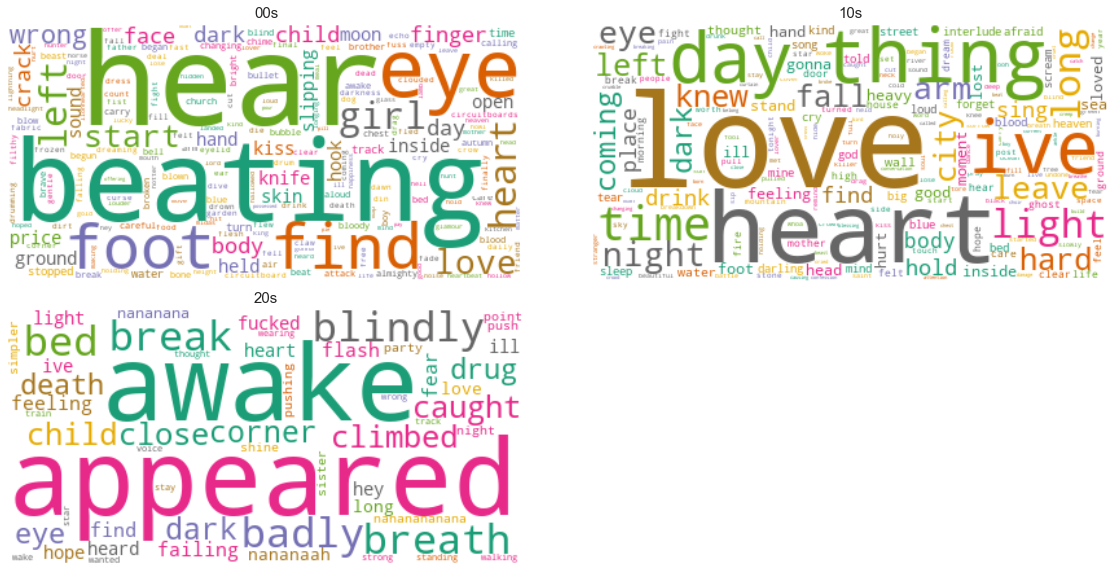

In [31]:
plot_wordcloud(vect_words,2,2)

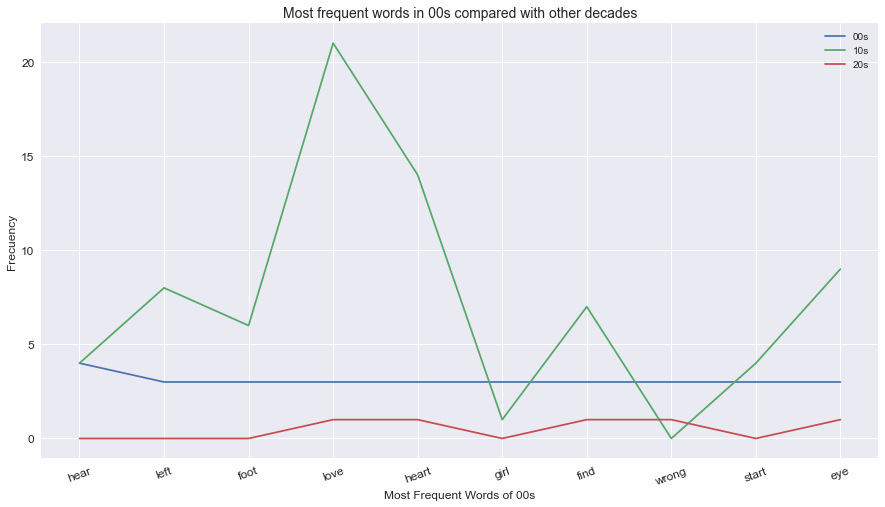

In [35]:
plot_freq_words(vect_words,'00s',10)

In [36]:
#Function that display the most common words used per decade
def unique_decade_words(df,decade,n_words):
    periods = []
    unique_words = []
    top_words = df.sort_values([decade],ascending=False).head(n_words).reset_index(drop=True)

    for d in top_words.columns[1:]:
        if d != decade:
            periods.append(d)

    for i in top_words.index:
        if top_words[periods[0]].iloc[i]<top_words[decade].min():
            if top_words[periods[1]].iloc[i]<top_words[decade].min():
                if top_words[periods[2]].iloc[i]<top_words[decade].min():
                    unique_words.append(top_words['words'].iloc[i])
    return unique_words

In [37]:
unique_decade_words(vect_words,'00s',10)

IndexError: list index out of range

In [38]:
#Sentiment Analysis using VADER Sentiment Intensinty Model

#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score 
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [39]:
df.head() 

,artist,title,album,decade,year,date,lyric,words,negative,neutral,positive,compound
0,Florence + The Machine,Jenny of Oldstones (Game of Thrones),None,10s,2019,2019-04-22,high in the halls of the kings who are gone je...,"[high, hall, king, gone, jenny, would, dance, ...",0.056,0.837,0.107,0.0711
1,Florence + The Machine,Dog Days Are Over,Lungs,00s,2009,2009-07-03,happiness hit her like a train on a track comi...,"[happiness, hit, like, train, track, coming, t...",0.058,0.823,0.119,0.9746
2,Florence + The Machine,Hunger,High As Hope,10s,2018,2018-05-03,ooh ooh oohooh ooh ooh ooh oohooh ooh ooh ooh ...,"[ooh, oohooh, seventeen, started, starve, thou...",0.206,0.690,0.104,-0.9865
3,Florence + The Machine,Shake It Out,Ceremonials,10s,2011,2011-09-14,regrets collect like old friends here to reliv...,"[regret, collect, like, old, friend, relive, d...",0.315,0.605,0.080,-0.9992
4,Florence + The Machine,Delilah,"How Big, How Blue, How Beautiful",10s,2015,2015-05-19,drifting through the halls with the sunrise ho...,"[drifting, hall, sunrise, holding, call, climb...",0.092,0.813,0.095,-0.8819


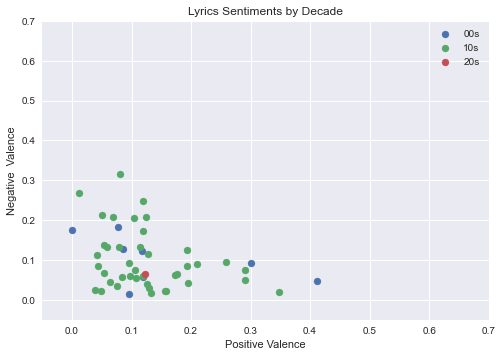

In [40]:
for name, group in df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [41]:
means_df = df.groupby(['decade']).mean()
means_df

,year,negative,neutral,positive,compound
decade,,,,,
00s,2009.000000,0.102500,0.746250,0.150875,0.069500
10s,2014.853659,0.100439,0.774683,0.124902,0.175966
20s,2020.000000,0.065000,0.813000,0.122000,0.961900


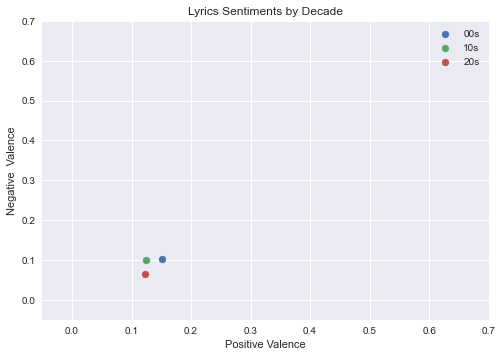

In [42]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()